In [1]:
#import pyaudio
import numpy as np
# import wave
#import moviepy.editor as mp
import librosa
from scipy import signal
import subprocess

c:\Users\henta\Anaconda3\envs\python38\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\Users\henta\Anaconda3\envs\python38\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [47]:
def findOffset(f1,f2):
    margin = 1
    y1, sr1 = librosa.load(f1,duration=5)
    y2, sr2 = librosa.load(f2,duration=20)
    c = signal.correlate(y2, y1[sr2*margin:sr2*(margin+2)], mode='valid', method='fft')
    peak = np.argmax(c)
    offset = round((peak / sr2) - margin, 2)
    # fig, ax = plt.subplots()
    # ax.plot(c)
    return offset

def doEP(EP,load=True,offset=None):

    soundPath = f"D:/Davinci/daVinci/lambda/nodejs/SeriesMy/EP.{EP}.mp4"
    videoPath = "E:/[ 不太灵免费公益影视站 www.butailing.com ]星落凝成糖[全40集][中文字幕].The.Starry.Love.2023.WEB-DL.2160p.H265.AAC-Xiaomi/The.Starry.Love.2023.E{:02d}.WEB-DL.2160p.H265.AAC-Xiaomi.mp4".format(EP)
    outPath = "E:/staryLove/EP.{:02d}.mp4".format(EP)
    if(offset==None):
        offset = findOffset(soundPath,videoPath)
    print(EP,offset)
    # offset = 6.99
    # subprocess.call()
    if load:
        p = subprocess.Popen(["ffmpeg","-y","-i",videoPath,"-itsoffset",f"{offset}","-i",soundPath,"-map","0:0","-map","1:1","-acodec","copy","-vcodec","copy",outPath], stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()

# EP = 8
#for EP in range (30,41):
    # doEP(EP)
doEP(18,True,100)

18 100


In [30]:
[x for x in range(8,10)]

[8, 9]

"b''"

In [21]:
print(output.decode())


Hyper fast Audio and Video encoder
usage: ffmpeg [options] [[infile options] -i infile]... {[outfile options] outfile}...

Getting help:
    -h      -- print basic options
    -h long -- print more options
    -h full -- print all options (including all format and codec specific options, very long)
    -h type=name -- print all options for the named decoder/encoder/demuxer/muxer/filter/bsf/protocol
    See man ffmpeg for detailed description of the options.

Print help / information / capabilities:
-L                  show license
-h topic            show help
-? topic            show help
-help topic         show help
--help topic        show help
-version            show version
-buildconf          show build configuration
-formats            show available formats
-muxers             show available muxers
-demuxers           show available demuxers
-devices            show available devices
-codecs             show available codecs
-decoders           show available decoders
-encode

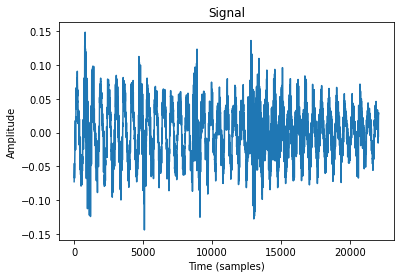

In [41]:
import matplotlib.pyplot as plt
samplingRate = 22050
start = samplingRate*3
end = start + samplingRate

plt.plot(y1[start:end]);

plt.title('Signal');

plt.xlabel('Time (samples)');

plt.ylabel('Amplitude');

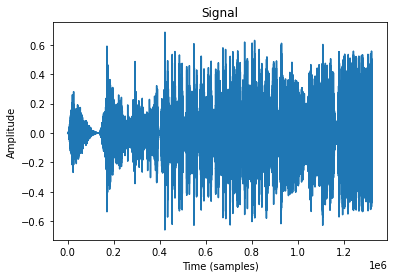

In [32]:
plt.plot(y2);

plt.title('Signal');

plt.xlabel('Time (samples)');

plt.ylabel('Amplitude');

6.99

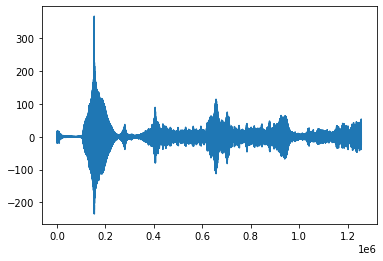

In [68]:
c = signal.correlate(y2, y1[sr2*0:sr2*3], mode='valid', method='fft')
peak = np.argmax(c)
offset = round(peak / sr2, 2)

fig, ax = plt.subplots()
ax.plot(c)

offset

In [47]:
offset

7.92